### FAKE NEWS DETECTION

##### Import Library

In [9]:
!pip install matplotlib seaborn


In [10]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("news.csv")

In [12]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
df.shape

(6335, 4)

In [14]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [15]:
labels = df.label

In [16]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.2, random_state = 30)

In [19]:
x_train.head()

2633    Washington (CNN) Donald Trump and Ben Carson n...
5356    The Supreme Court said Tuesday that it will co...
1539    Report Copyright Violation Do you think there ...
1699    But the numbers were a boring datapoint in an ...
940                                                      
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer



In [6]:
 # Initilise a TfidfVectorizer
vector = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [7]:
# Fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

NameError: name 'x_train' is not defined

In [1]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

NameError: name 'PassiveAggressiveClassifier' is not defined

In [ ]:
# predicton the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = pac.predict(tf_test)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(tf_train, y_train)
y_pred_lr = lr.predict(tf_test)
score_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {round(score_lr * 100, 2)}%")
print(confusion_matrix(y_test, y_pred_lr, labels=['FAKE', 'REAL']))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 93.05%
[[613  27]
 [ 61 566]]
              precision    recall  f1-score   support

        FAKE       0.91      0.96      0.93       640
        REAL       0.95      0.90      0.93       627

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



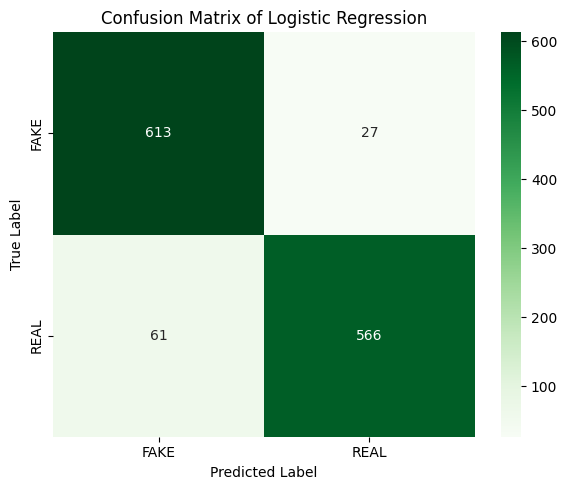

In [ ]:
# Confusion Matrix Heatmap for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr, labels=['FAKE', 'REAL'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.tight_layout()
plt.show()


In [ ]:
# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(tf_train, y_train)
y_pred_nb = nb.predict(tf_test)
score_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {round(score_nb * 100, 2)}%")
print(confusion_matrix(y_test, y_pred_nb, labels=['FAKE', 'REAL']))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 83.66%
[[442 198]
 [  9 618]]
              precision    recall  f1-score   support

        FAKE       0.98      0.69      0.81       640
        REAL       0.76      0.99      0.86       627

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.83      1267
weighted avg       0.87      0.84      0.83      1267



In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(tf_train, y_train)
y_pred_rf = rf.predict(tf_test)
score_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {round(score_rf * 100, 2)}%")
print(confusion_matrix(y_test, y_pred_rf, labels=['FAKE', 'REAL']))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 91.71%
[[581  59]
 [ 46 581]]
              precision    recall  f1-score   support

        FAKE       0.93      0.91      0.92       640
        REAL       0.91      0.93      0.92       627

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(tf_train, y_train)
y_pred_gb = gb.predict(tf_test)
score_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {round(score_gb * 100, 2)}%")
print(confusion_matrix(y_test, y_pred_gb, labels=['FAKE', 'REAL']))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 90.92%
[[590  50]
 [ 65 562]]
              precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       640
        REAL       0.92      0.90      0.91       627

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [ ]:
score = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.71%


In [ ]:
# confusion metrics
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[609,  31],
       [ 36, 591]])

In [ ]:
# ROC Curve and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test).ravel()
y_scores = pac.decision_function(tfidf_test)
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


NameError: name 'tfidf_test' is not defined

In [ ]:
# Evaluate Passive Aggressive accuracy (if not already done)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

# Evaluate Logistic Regression accuracy (if not already done)
y_pred_lr = lr.predict(tfidf_test)
score_lr = accuracy_score(y_test, y_pred_lr)


NameError: name 'pac' is not defined

In [ ]:
# Accuracy comparison bar chart
models = ['Passive Aggressive', 'Logistic Regression']
accuracies = [score * 100, score_lr * 100]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(80, 100)
plt.tight_layout()
plt.show()


NameError: name 'score' is not defined

In [ ]:
# save model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename,'wb'))

In [ ]:
# save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))